# Import Necessary Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data from CSV

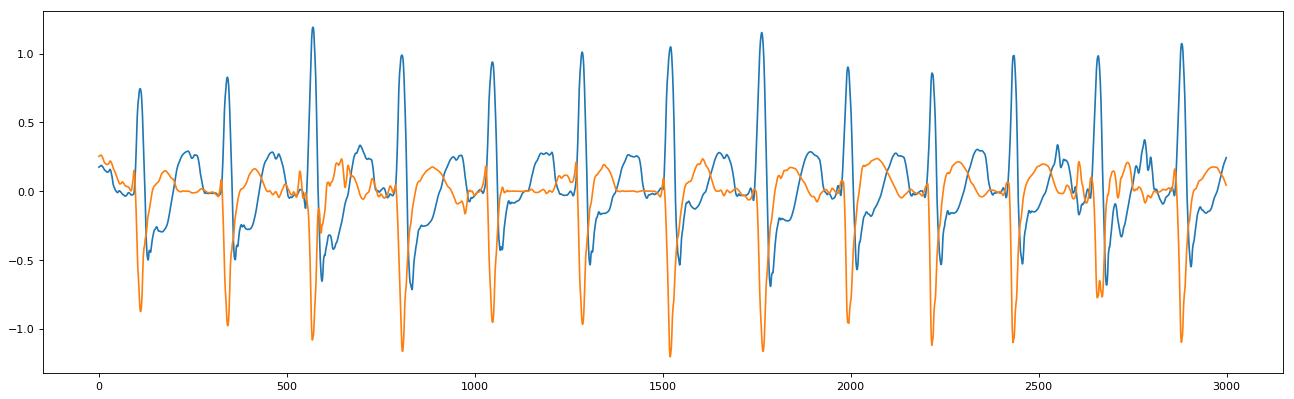

In [2]:
DS1 = ['101', '106', '108', '109', '112', '114', '115', '116', '118', '119', '122', '124', 
       '201', '203', '205', '207', '208', '209', '215', '220', '223', '230']

trainingSet_leads = {}
trainingSet_anns = {}
for ds in DS1:
    trainingSet_leads[ds] = pd.read_csv('Cleaned TrainingSet/' + ds + '_lead.csv')
    trainingSet_anns[ds] = pd.read_csv('Cleaned TrainingSet/' + ds + '_ann.csv')

# 测试读取情况
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(trainingSet_leads['109'][:3000])
plt.show()

# Heartbeat Annotation

In [3]:
N = ['N', 'L', 'R', 'e', 'j']
SVEB = ['A', 'a', 'J', 'S']
VEB = ['V', 'E']
F = ['F']
Q = ['P', 'f', 'U']
Non_beat_anns = ['[', ']', '!', 'x', '(', ')', 'p', 't', 'u', '`', '~', '^', '|', '+', 's', 'T', '*', 'D', '=', '"', '@']

# Heatbeat Segmentation

For each heartbeat knowing the R location, we take samples from the interval of 250 ms before R peak and 400 ms after R peak, i.e. total 0.65 s of each heartbeat. That is, 90 samples before R peak and 144 samples after R peak.

In [4]:
Hbs = {}
for ds in DS1:
    lead0 = trainingSet_leads[ds]['lead0']
    lead1 = trainingSet_leads[ds]['lead1']
    hbs0 = []
    hbs1 = []
    anns = []
    annIdxs = []
    for row in trainingSet_anns[ds].itertuples():
        if row[2] in Non_beat_anns:
            continue
        elif row[1] < 91:
            continue
        elif row[1] + 144 > len(lead0):
            continue
        else:
            anns.append(row[2])
            annIdxs.append(row[1] - 1)
            hbs0.append(lead0[row[1] - 91: row[1] + 144])
            hbs1.append(lead1[row[1] - 91: row[1] + 144])
    Hbs[ds] = pd.DataFrame({'lead0': hbs0, 'lead1': hbs1, 'ann': anns, 'annIdx': annIdxs})

# 测试segmentation情况
Hbs['230']

,ann,annIdx,lead0,lead1
0,N,348,258 -0.042078 259 -0.043460 260 -0.04448...,258 -0.039954 259 -0.041158 260 -0.04203...
1,N,615,525 -0.048473 526 -0.053367 527 -0.05693...,525 -0.046625 526 -0.048911 527 -0.05015...
2,N,879,789 -0.060152 790 -0.062797 791 -0.06...,789 -0.033493 790 -0.037047 791 -0.03...
3,N,1137,1047 -0.076912 1048 -0.085018 1049 -0.09...,1047 -0.022912 1048 -0.027599 1049 -0.03...
4,N,1399,1309 0.011639 1310 0.011823 1311 0.01...,1309 -0.031675 1310 -0.035828 1311 -0.03...
5,N,1665,1575 -0.005642 1576 -0.007687 1577 -0.01...,1575 -0.029827 1576 -0.030038 1577 -0.03...
6,N,1925,1835 -0.094674 1836 -0.098730 1837 -0.10...,1835 -0.037774 1836 -0.039638 1837 -0.04...
7,N,2198,2108 -0.049983 2109 -0.056472 2110 -0.06...,2108 -0.044898 2109 -0.044204 2110 -0.04...
8,N,2466,2376 -0.017122 2377 -0.022907 2378 -0.02...,2376 -0.043877 2377 -0.042901 2378 -0.04...
9,N,2725,2635 0.003155 2636 0.006594 2637 0.01...,2635 -0.052277 2636 -0.056282 2637 -0.06...


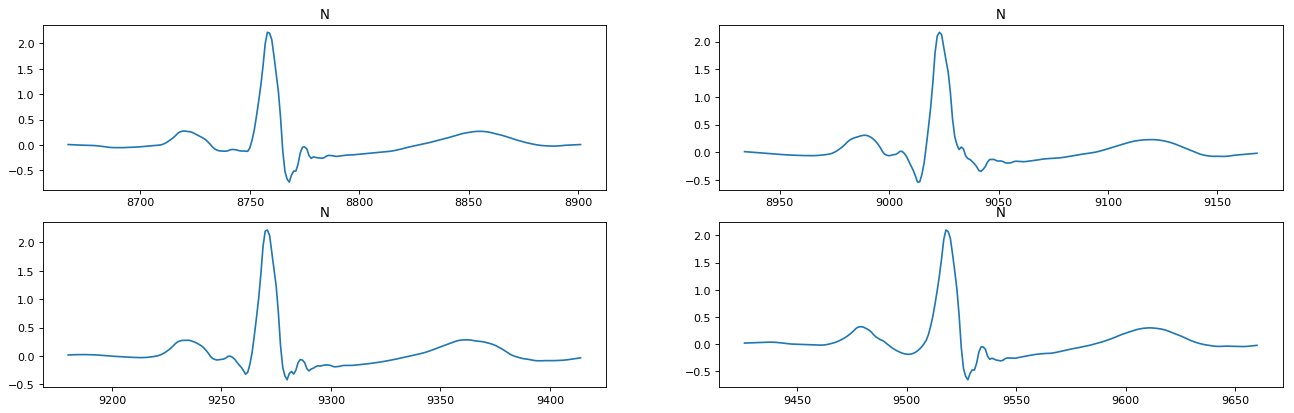

In [5]:
hb_num = 26
hb_set = '106'
plt.figure(figsize=(20, 6), dpi=80)
p1 = plt.subplot(221)
p1.plot(Hbs[hb_set]['lead0'][hb_num])
p1.set_title(Hbs[hb_set]['ann'][hb_num])
p2 = plt.subplot(222)
p2.plot(Hbs[hb_set]['lead0'][hb_num+1])
p2.set_title(Hbs[hb_set]['ann'][hb_num+1])
p3 = plt.subplot(223)
p3.plot(Hbs[hb_set]['lead0'][hb_num+2])
p3.set_title(Hbs[hb_set]['ann'][hb_num+2])
p4 = plt.subplot(224)
p4.plot(Hbs[hb_set]['lead0'][hb_num+3])
p4.set_title(Hbs[hb_set]['ann'][hb_num+3])
plt.show()

# Computing RR Intervals

In [6]:
for ds in DS1:
    dsLast = len(Hbs[ds]['annIdx']) - 1
    preRR = [np.NAN]
    postRR = [Hbs[ds]['annIdx'][1] - Hbs[ds]['annIdx'][0]]
    for l in range(1, dsLast):
        preRR.append(Hbs[ds]['annIdx'][l] - Hbs[ds]['annIdx'][l-1])
        postRR.append(Hbs[ds]['annIdx'][l+1] - Hbs[ds]['annIdx'][l])
    preRR.append(Hbs[ds]['annIdx'][dsLast] - Hbs[ds]['annIdx'][dsLast-1])
    postRR.append(np.NAN)
    Hbs[ds]['preRR'] = preRR
    Hbs[ds]['postRR'] = postRR

In [7]:
Hbs['108']

,ann,annIdx,lead0,lead1,preRR,postRR
0,N,441,351 0.120418 352 0.131024 353 0.14175...,351 0.081948 352 0.083029 353 0.07829...,NaN,347.0
1,N,788,698 0.079978 699 0.090436 700 0.10201...,698 0.070500 699 0.080962 700 0.09260...,347.0,366.0
2,N,1154,1064 0.159662 1065 0.169742 1066 0.18...,1064 0.098317 1065 0.093917 1066 0.08...,366.0,338.0
3,N,1492,1402 0.078804 1403 0.089469 1404 0.10...,1402 0.034288 1403 0.046078 1404 0.05...,338.0,328.0
4,N,1820,1730 0.094222 1731 0.101098 1732 0.10...,1730 0.044182 1731 0.055385 1732 0.06...,328.0,336.0
5,N,2156,2066 0.037775 2067 0.042137 2068 0.04...,2066 -0.006833 2067 0.000009 2068 0.00...,336.0,360.0
6,N,2516,2426 0.166031 2427 0.178498 2428 0.18...,2426 0.058149 2427 0.055271 2428 0.04...,360.0,372.0
7,N,2888,2798 0.121368 2799 0.131461 2800 0.14...,2798 0.058178 2799 0.061465 2800 0.06...,372.0,349.0
8,N,3237,3147 0.073041 3148 0.084327 3149 0.09...,3147 0.042782 3148 0.056400 3149 0.07...,349.0,355.0
9,N,3592,3502 0.130744 3503 0.143084 3504 0.15...,3502 0.085314 3503 0.088335 3504 0.08...,355.0,331.0


# Beat Visualization and R-Peak Correction

以下是一些标记有问题的例子，以108为例，它的正常beats居然呈现如此多样化

ann:  {'A', 'N', 'F', 'V', 'j'}
heartbeats amount:  1762


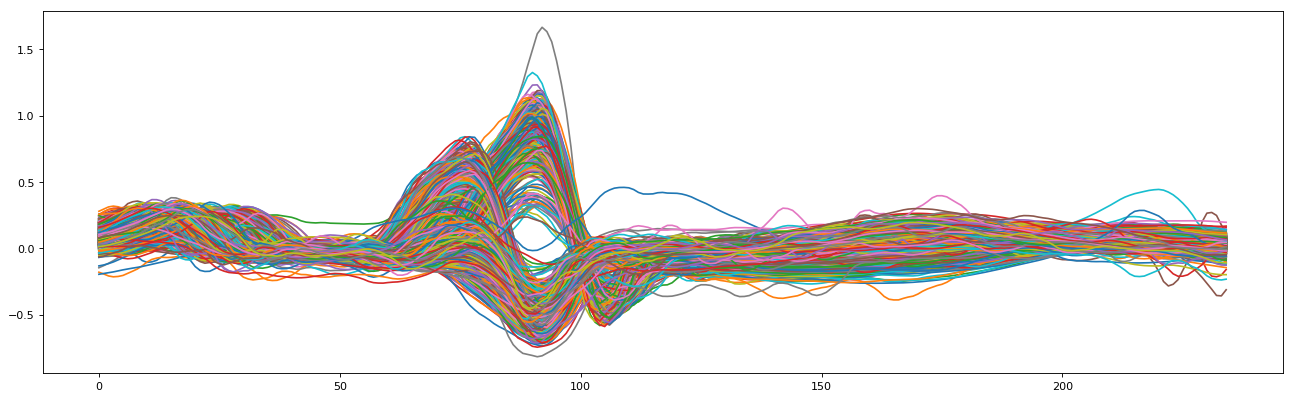

In [8]:
ds = '108'
print('ann: ', set(Hbs[ds]['ann']))
print('heartbeats amount: ', len(Hbs[ds]))
plt.figure(figsize=(20, 6), dpi=80)
for i in range(len(Hbs[ds])):
    if Hbs[ds]['ann'][i] in N:
        beat = Hbs[ds]['lead0'][i]
        temp = pd.Series(list(beat))
        plt.plot(temp)
plt.show()

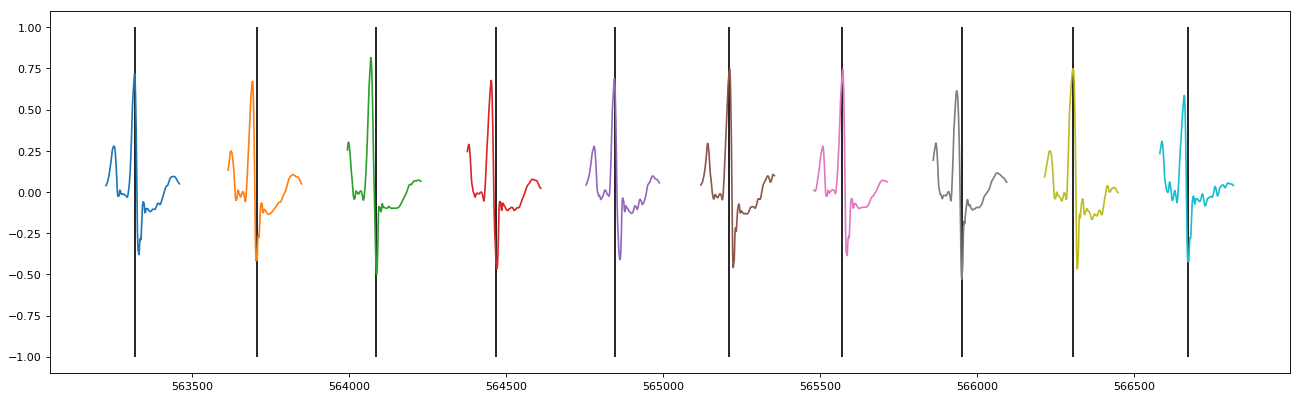

In [23]:
plt.figure(figsize=(20, 6), dpi=80)
start = 1501
for i in range(start,start+10):
    if Hbs[ds]['ann'][i] in N:
        beat = Hbs[ds]['lead0'][i]
        temp = pd.Series(list(beat))
        plt.plot(beat)
        plt.vlines(trainingSet_anns['108']['annIdx'][i+55], -1,1)
plt.show()

In [14]:
trainingSet_anns['108'][annIdx]

,annIdx,annType
0,23,+
1,88,N
2,442,N
3,789,N
4,1155,N
5,1493,N
6,1821,N
7,2157,N
8,2517,N
9,2889,N


In [15]:
j=0
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(N_Mean[0])
plt.plot(Hbs['108']['lead0'][j])
plt.vlines(Hbs['108']['annIdx'][j], -1, 1)
plt.show()

NameError: name 'N_Mean' is not defined

In [11]:
def R_Correction(beat, spacing = 80):
    length = beat.size
    x = np.zeros(length + 2 * spacing)
    x[: spacing] = float("-inf")
    x[-spacing: ] = float("-inf")
    x[spacing: spacing + length] = beat
    r_candidate = np.zeros(length)
    r_candidate[:] = True
    for s in range(spacing):
        start = spacing - s - 1
        h_b = x[start: start + length]  # before
        start = spacing
        h_c = x[start: start + length]  # central
        start = spacing + s + 1
        h_a = x[start: start + length]  # after
        r_candidate = np.logical_and(r_candidate, np.logical_and(h_c > h_b, h_c > h_a))
    r_idx = np.argwhere(r_candidate)
    r_idx = r_idx.reshape(r_idx.size)
    return r_idx

In [12]:
ttt = R_Correction(Hbs['108']['lead0'][0])
ttt[:10]

array([ 15, 183], dtype=int64)

# Average Beat

In [13]:
MedianNormalBeat = pd.DataFrame()
MeanNormalBeat = pd.DataFrame()
for ds in DS1:
    N_DF = pd.DataFrame()
    for i in range(len(Hbs[ds])):
        if Hbs[ds]['ann'][i] in N:
            beat = Hbs[ds]['lead0'][i]
            temp = pd.Series(list(beat))
            N_DF['beat_'+str(i)] = temp
    MedianNormalBeat[ds] = N_DF.median(axis=1)
    MeanNormalBeat[ds] = N_DF.mean(axis=1)

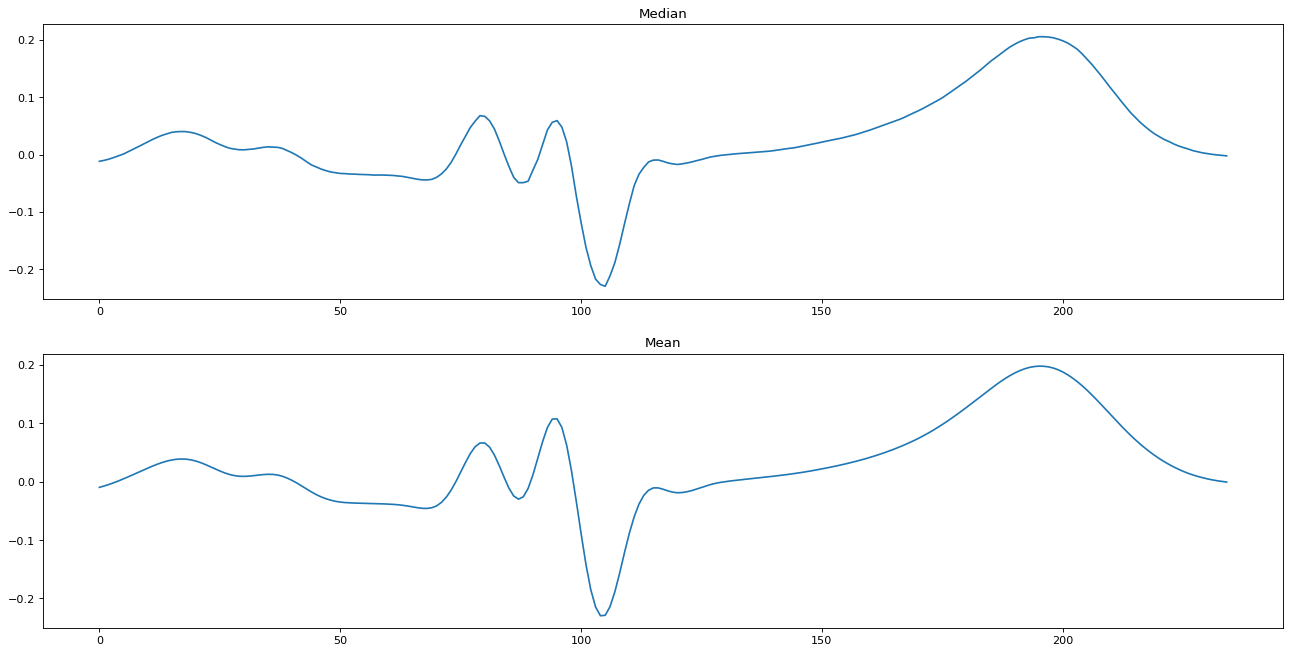

In [14]:
# beware of 108, 114, 118, 207
ds = '114'
plt.figure(figsize=(20, 10), dpi=80)
p1 = plt.subplot(211)
p1.plot(MedianNormalBeat[ds])
p1.set_title('Median')
p2 = plt.subplot(212)
p2.plot(MeanNormalBeat[ds])
p2.set_title('Mean')
plt.show()

In [13]:
Hbs['108']

,ann,annIdx,lead0,lead1,preRR,postRR
0,N,441,351 0.120418 352 0.131024 353 0.14175...,351 0.081948 352 0.083029 353 0.07829...,NaN,347.0
1,N,788,698 0.079978 699 0.090436 700 0.10201...,698 0.070500 699 0.080962 700 0.09260...,347.0,366.0
2,N,1154,1064 0.159662 1065 0.169742 1066 0.18...,1064 0.098317 1065 0.093917 1066 0.08...,366.0,338.0
3,N,1492,1402 0.078804 1403 0.089469 1404 0.10...,1402 0.034288 1403 0.046078 1404 0.05...,338.0,328.0
4,N,1820,1730 0.094222 1731 0.101098 1732 0.10...,1730 0.044182 1731 0.055385 1732 0.06...,328.0,336.0
5,N,2156,2066 0.037775 2067 0.042137 2068 0.04...,2066 -0.006833 2067 0.000009 2068 0.00...,336.0,360.0
6,N,2516,2426 0.166031 2427 0.178498 2428 0.18...,2426 0.058149 2427 0.055271 2428 0.04...,360.0,372.0
7,N,2888,2798 0.121368 2799 0.131461 2800 0.14...,2798 0.058178 2799 0.061465 2800 0.06...,372.0,349.0
8,N,3237,3147 0.073041 3148 0.084327 3149 0.09...,3147 0.042782 3148 0.056400 3149 0.07...,349.0,355.0
9,N,3592,3502 0.130744 3503 0.143084 3504 0.15...,3502 0.085314 3503 0.088335 3504 0.08...,355.0,331.0


# 做个测试

In [15]:
from tslearn import metrics
df108 = []
N_Median = []
N_Mean = []
number = []
var = 0
threshold = 5

for beat in Hbs['108']['lead0']:
    flag = False
    for i in range(var):
        dfTemp = pd.DataFrame()
        dfTemp['1'] = N_Median[i]
        dfTemp['2'] = pd.Series(list(beat))
        medianGap = dfTemp.mean(axis=1)
        sim1 = metrics.dtw(medianGap, N_Mean[i])
        sim2 = metrics.dtw(N_Median[i], N_Mean[i])
        if sim2 < 0.1:
            sim2 = 0.1
        if sim1 > sim2 * threshold:
            continue
        else:
            flag = True
            df108[i][str(number[i])] = pd.Series(list(beat))
            number[i] += 1
            N_Median[i] = df108[i].median(axis=1)
            N_Mean[i] = df108[i].mean(axis=1)
            break
    if not flag:
        N_Median.append(pd.Series(list(beat)))
        N_Mean.append(pd.Series(list(beat)))
        number.append(1)
        var += 1
        df108.append(pd.DataFrame({str(number[var-1]-1): pd.Series(list(beat))}))
    

In [42]:
len(number)

7

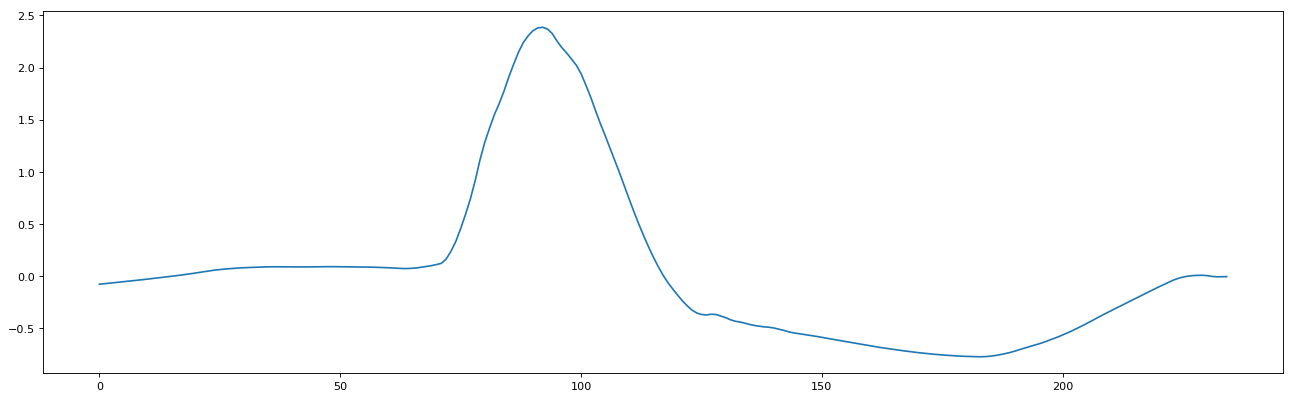

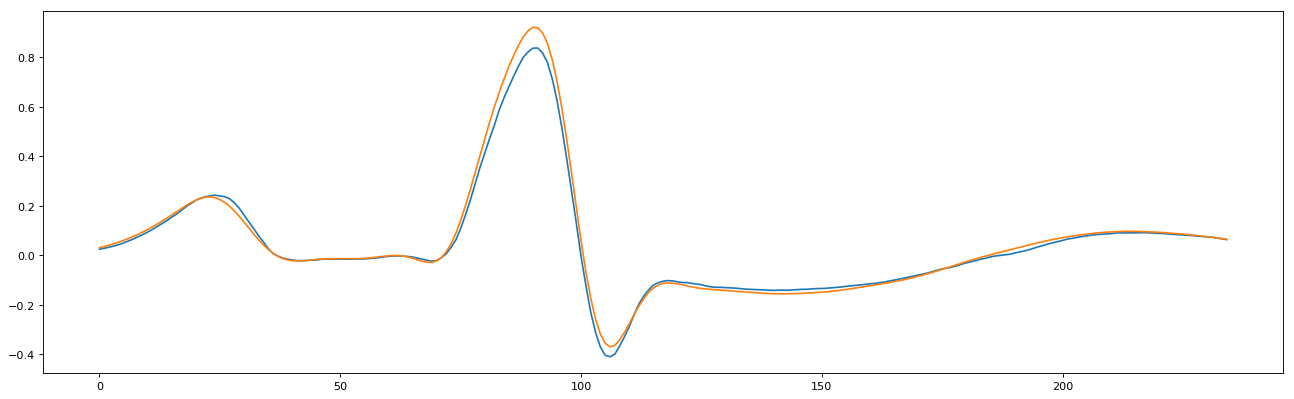

In [46]:
category = 6
plt.figure(figsize=(20, 6), dpi=80)
for i in range(number[category]):
    plt.plot(df108[category][str(i)])
plt.show()
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(N_Median[1])
plt.plot(N_Mean[2])
plt.show()

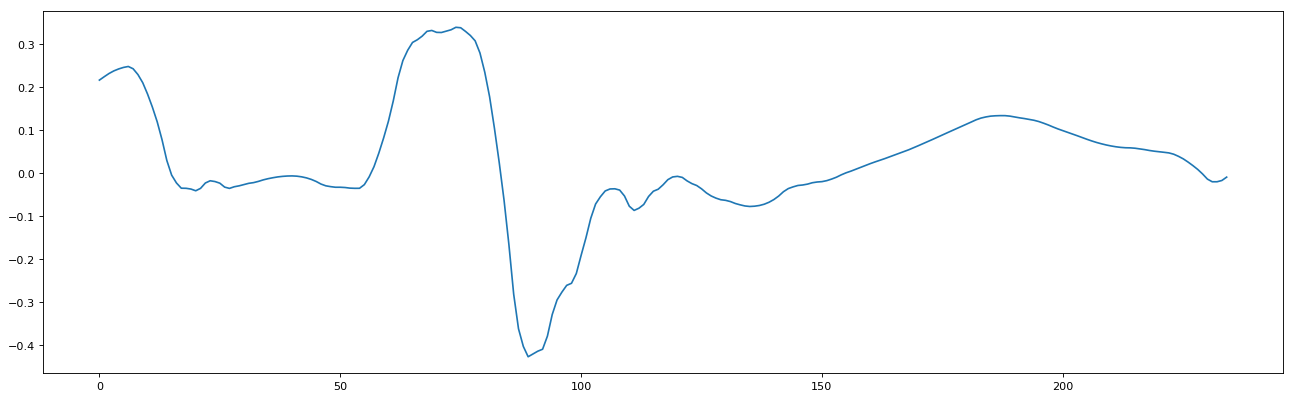

In [68]:
plt.figure(figsize=(20, 6), dpi=80)
for f in [0]:
    plt.plot(df108[3][str(f)])
plt.show()

In [ ]:
sim = metrics.dtw(Hbs['108']['lead0'][0], N_Mean[1])

In [66]:
metrics.dtw(df108[3][str(6)], df108[3][str(7)])

0.67096969210568125

In [ ]:
a = []
b = pd.DataFrame({'0':pd.Series(list(beat))})
b['1'] = pd.Series(list(beat))
a.append(b) 

In [ ]:
a.append(b) 
a[1]['2'] = pd.Series(list(beat))

In [ ]:
a[1]